In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('training_data.csv' , index_col=0) #header= 18382

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
28835,220000,2,1,2,36,0,0,0,0,0,0,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779,1
25329,200000,2,3,2,29,-1,-1,-1,-1,-1,-1,326,326,326,326,326,326,326,326,326,326,326,326,0
18894,180000,2,1,2,27,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0
690,80000,1,2,2,32,0,0,0,0,0,0,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500,0
6239,10000,1,2,2,27,0,0,0,0,0,0,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000,1


In [4]:
df.shape

(22500, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22500 entries, 28835 to 7624
Data columns (total 24 columns):
X1     22500 non-null object
X2     22500 non-null object
X3     22500 non-null object
X4     22500 non-null object
X5     22500 non-null object
X6     22500 non-null object
X7     22500 non-null object
X8     22500 non-null object
X9     22500 non-null object
X10    22500 non-null object
X11    22500 non-null object
X12    22500 non-null object
X13    22500 non-null object
X14    22500 non-null object
X15    22500 non-null object
X16    22500 non-null object
X17    22500 non-null object
X18    22500 non-null object
X19    22500 non-null object
X20    22500 non-null object
X21    22500 non-null object
X22    22500 non-null object
X23    22500 non-null object
Y      22500 non-null object
dtypes: object(24)
memory usage: 4.3+ MB


In [6]:
df[df['X1'] == "LIMIT_BAL"]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


In [7]:
df.drop(['ID'], inplace = True)

In [8]:
for column in df.columns:
    df[column] = pd.to_numeric(df[column])

In [9]:
df.dtypes

X1     int64
X2     int64
X3     int64
X4     int64
X5     int64
X6     int64
X7     int64
X8     int64
X9     int64
X10    int64
X11    int64
X12    int64
X13    int64
X14    int64
X15    int64
X16    int64
X17    int64
X18    int64
X19    int64
X20    int64
X21    int64
X22    int64
X23    int64
Y      int64
dtype: object

In [10]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000,2.249900e+04,22499.000000,22499.000000,22499.000000,22499.000000,2.249900e+04,22499.000000,22499.000000,22499.000000,22499.000000,22499.000000
mean,167054.521534,1.603227,1.855282,1.553358,35.447931,-0.014090,-0.128806,-0.160185,-0.214587,-0.259700,-0.287613,51455.869416,49385.313214,4.704213e+04,43329.149562,40306.373039,38955.000356,5627.914796,5.964393e+03,5258.912307,4792.971777,4865.656029,5247.279301,0.223477
std,129864.960118,0.489239,0.791905,0.521418,9.237634,1.123191,1.197954,1.198880,1.174824,1.139984,1.154249,74470.257248,71953.814345,6.991792e+04,64607.088483,60918.993067,59773.144959,16628.162287,2.444370e+04,18153.554633,15872.858180,15507.449610,17892.327398,0.416584
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-81334.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3506.000000,2975.000000,2.611500e+03,2319.500000,1732.500000,1230.000000,1000.000000,8.290000e+02,396.000000,284.000000,246.500000,100.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22387.000000,21145.000000,2.005300e+04,19048.000000,18050.000000,16924.000000,2100.000000,2.004000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66988.500000,63755.000000,6.016100e+04,54494.500000,50196.000000,49250.000000,5002.000000,5.000000e+03,4500.000000,4000.000000,4068.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,388071.000000,528666.000000,1.000000


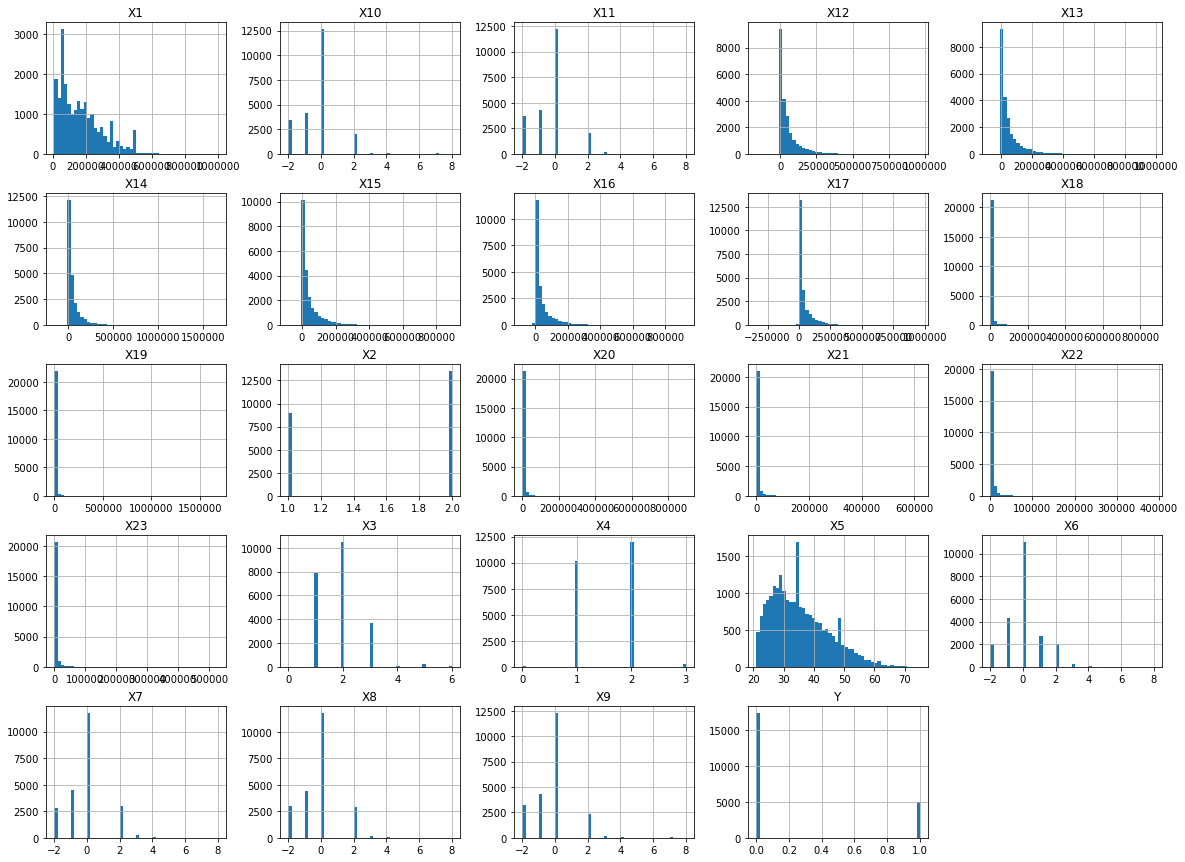

In [11]:
df.hist(bins=50, figsize=(20,15))
plt.show();

In [12]:
df.nunique()

X1        80
X2         2
X3         7
X4         4
X5        55
X6        11
X7        11
X8        11
X9        11
X10       10
X11       10
X12    17664
X13    17340
X14    17115
X15    16767
X16    16325
X17    16092
X18     6630
X19     6568
X20     6257
X21     5756
X22     5749
X23     5788
Y          2
dtype: int64

Statistics for categorical target variable - Y 
Unique Value : [1 0]
data proportions : 
 0    17471
1     5028
Name: Y, dtype: int64
data prop percentage : 
 0    0.776523
1    0.223477
Name: Y, dtype: float64
num_miss : 0
pct_miss : 0.0


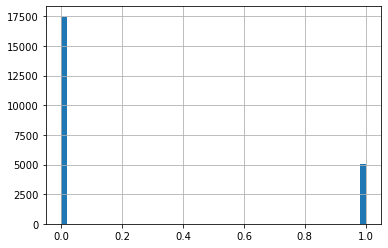

In [13]:
df.Y.hist(bins = 50);

print('Statistics for categorical target variable - Y ')
print('Unique Value :',df['Y'].unique())
print('data proportions :','\n', df.Y.value_counts())
print('data prop percentage :','\n', df.Y.value_counts(normalize = True))
print('num_miss :', df['Y'].isnull().sum())
print('pct_miss :', (df['Y'].isnull().sum()/ len(df)).round(3)*100)

possible class imbalance problem here... only 22% of datapoints are defaulted while 77% are not defaulted. How will you deal with this.

In [14]:
# Split data to be used in the models
# Create matrix of features
X = df.drop('Y', axis = 1) # grabs everything else but 'Survived'


# Create target variable
y = df['Y'] # y is the column we're trying to predict
X.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23'],
      dtype='object')

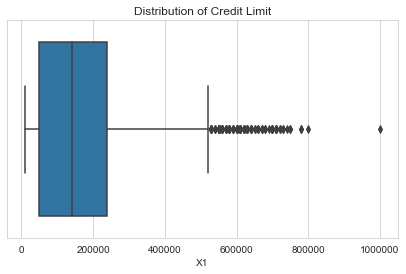

In [15]:
fig = plt.figure(figsize = (7,4))
sns.set_style(style="whitegrid")
sns.boxplot(x = df['X1'],linewidth=1.5);
plt.title('Distribution of Credit Limit');

* Extreme outlier in X1 for 1,000,000 which is the furthest from the mean, fall outside of the IQR and also very far from the next obs before it.
* **Remove this obs**

In [16]:
df[df['X1']== 1000000]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
2198,1000000,2,1,1,47,0,0,0,-1,0,0,964511,983931,535020,891586,927171,961664,50784,50723,896040,50000,50000,50256,0


In [17]:
df.drop(labels='2198', inplace=True)

/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


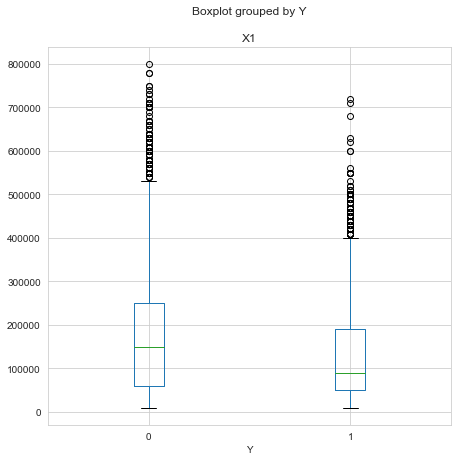

In [18]:
df.boxplot('X1', by = 'Y',figsize=(7,7))

* For non- default in Payment as 0: The average credit balance is higher than for defaulted Payees

In [19]:
print('Default', df[df['Y']== 1]['X1'].mean())
print('Non-Default', df[df['Y']== 0]['X1'].mean())

Default 129301.44789180589
Non-Default 177872.4670864339


In [20]:
df['X1'].corr(df['Y'])

-0.15594909147452996

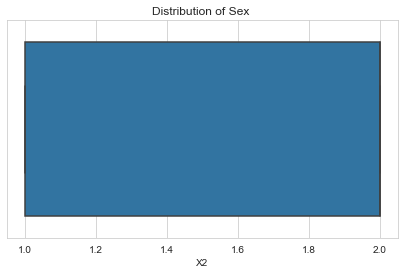

In [21]:
fig = plt.figure(figsize = (7,4))
sns.set_style(style="whitegrid")
sns.boxplot(x = df['X2'],linewidth=1.5);
plt.title('Distribution of Sex ');

* All obs within limit of 1 for male and 2 for female.
* **Dummy** variable here

In [22]:
print(df['X2'].value_counts())
print(df['X2'].value_counts(normalize = True))


2    13571
1     8927
Name: X2, dtype: int64
2    0.603209
1    0.396791
Name: X2, dtype: float64


Female obs are at 60% and male obs are at ~40%

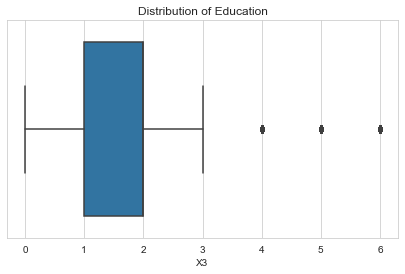

In [23]:
fig = plt.figure(figsize = (7,4))
sns.set_style(style="whitegrid")
sns.boxplot(x = df['X3'],linewidth=1.5);
plt.title('Distribution of Education');

In [24]:
df['X3'].value_counts()

2    10516
1     7918
3     3713
5      208
4       90
6       42
0       11
Name: X3, dtype: int64

* 1 for grad school, 2 for University, 3 for High School and 4 for others
* On average most obs have a university or grad school achievement
* Obs 5, 6 and 0 don't make sense

In [25]:
print('1', df[df['X3'] == 1]['X1'].mean())
print('2', df[df['X3'] == 2]['X1'].mean())
print('3', df[df['X3'] == 3]['X1'].mean())
print('4', df[df['X3'] == 4]['X1'].mean())
print('5', df[df['X3'] == 5]['X1'].mean())
print('6', df[df['X3'] == 6]['X1'].mean())
print('0', df[df['X3'] == 0]['X1'].mean())

1 213289.97221520587
2 146419.3609737543
3 125641.71290061944
4 230000.0
5 161951.92307692306
6 135000.0
0 220000.0


In [26]:
print('1', df[df['X3'] == 1]['X5'].mean())
print('2', df[df['X3'] == 2]['X5'].mean())
print('3', df[df['X3'] == 3]['X5'].mean())
print('4', df[df['X3'] == 4]['X5'].mean())
print('5', df[df['X3'] == 5]['X5'].mean())
print('6', df[df['X3'] == 6]['X5'].mean())
print('0', df[df['X3'] == 0]['X5'].mean())

1 34.230234907805
2 34.65880562951693
3 40.15728521411258
4 34.666666666666664
5 35.9375
6 43.904761904761905
0 40.54545454545455


* **No relation found in avg age with education or education and avg credit limit** 
* Might be safe to just place 0,5,6 in the 4 group

In [27]:
df["X3"].replace([0, 5, 6], 4, inplace = True)

In [28]:
df['X3'].value_counts()

2    10516
1     7918
3     3713
4      351
Name: X3, dtype: int64

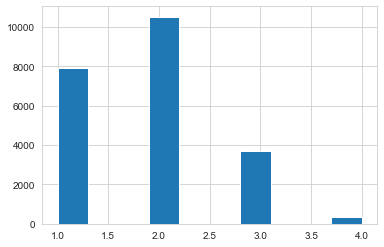

In [29]:
df['X3'].hist()

/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


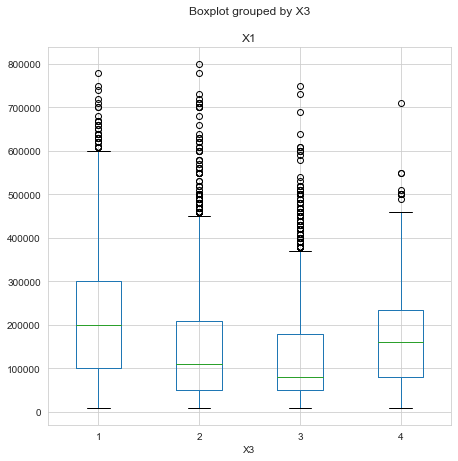

In [30]:
df.boxplot('X1', by = 'X3',figsize=(7,7))

In [31]:
df.loc[(df['X3']==4) & (df['X1'] >= 700000)]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
23092,710000,2,4,2,32,0,0,0,0,0,0,377249,382116,391305,195642,189101,182062,11000,12000,8000,7000,7000,6500,0


In [32]:
df.drop(labels = ['23092'], inplace = True)

In [33]:
df['Y'].corr(df['X3'])

0.03743420911442318

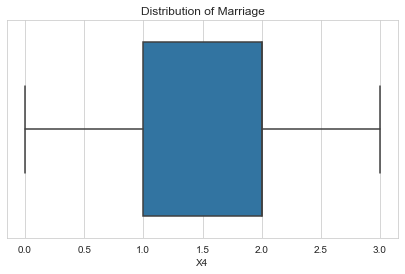

In [34]:
fig = plt.figure(figsize = (7,4))
sns.set_style(style="whitegrid")
sns.boxplot(x = df['X4'],linewidth=1.5);
plt.title('Distribution of Marriage');

In [35]:
df['X4'].value_counts()

2    12025
1    10194
3      234
0       44
Name: X4, dtype: int64

In [36]:
df.shape

(22497, 24)

* 1 = married; 2 = single; 3 = others
* Unsure about the observations labeled 0: 44 obs
    * replacing the ) values with 3 for others

In [37]:
df["X4"].replace(0, 3, inplace = True)

In [38]:
df["X4"].value_counts()

2    12025
1    10194
3      278
Name: X4, dtype: int64

In [39]:
df['X4'].corr(df['Y'])

-0.032128439803447484

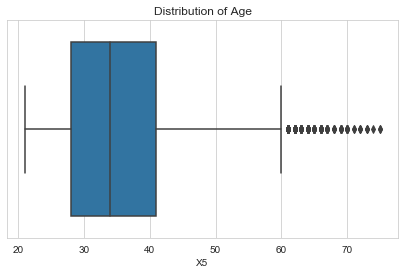

In [40]:
fig = plt.figure(figsize = (7,4))
sns.set_style(style="whitegrid")
sns.boxplot(x = df['X5'],linewidth=1.5);
plt.title('Distribution of Age');

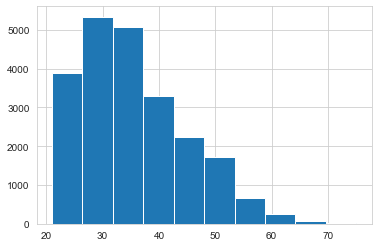

In [41]:
df['X5'].hist()

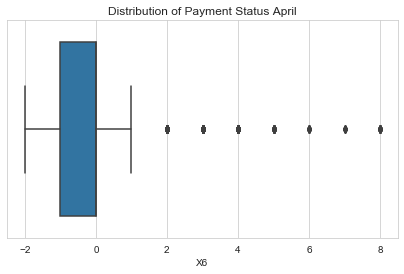

In [42]:
fig = plt.figure(figsize = (7,4))
sns.set_style(style="whitegrid")
sns.boxplot(x = df['X6'],linewidth=1.5);
plt.title('Distribution of Payment Status April');

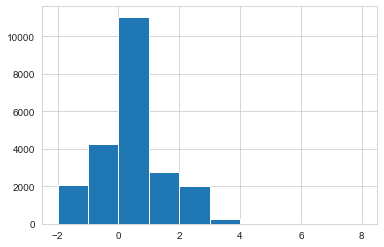

In [43]:
df['X6'].hist()

In [44]:
df['X6'].value_counts()

 0    11055
-1     4272
 1     2750
-2     2048
 2     2032
 3      239
 4       51
 5       20
 8       15
 6        9
 7        6
Name: X6, dtype: int64

* -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* Not sure about the -2 and 0.
* replacing -2 and -1 with 0 as paid duly. setting it as 0 instead of -1 will allow for better average value

In [45]:
print(df['X6'].corr(df['Y']))
df['X6'].replace([-2,-1], 0, inplace = True)

0.324776734437637


In [46]:
print(df['X6'].value_counts())

print(df['X6'].corr(df['Y']))

0    17375
1     2750
2     2032
3      239
4       51
5       20
8       15
6        9
7        6
Name: X6, dtype: int64
0.39332107343883155


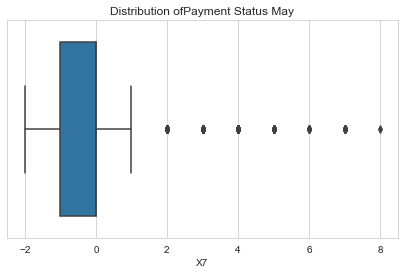

In [47]:
fig = plt.figure(figsize = (7,4))
sns.set_style(style="whitegrid")
sns.boxplot(x = df['X7'],linewidth=1.5);
plt.title('Distribution ofPayment Status May');

In [48]:
df['X7'].value_counts()

 0    11802
-1     4526
 2     2967
-2     2813
 3      251
 4       70
 1       24
 5       19
 7       16
 6        8
 8        1
Name: X7, dtype: int64

In [49]:
df['X7'].corr(df['Y'])

0.266818642100241

In [50]:
df['X7'].replace([-2,-1], 0, inplace = True)

print(df['X7'].value_counts())

print(df['X7'].corr(df['Y']))

0    19141
2     2967
3      251
4       70
1       24
5       19
7       16
6        8
8        1
Name: X7, dtype: int64
0.325239926338401


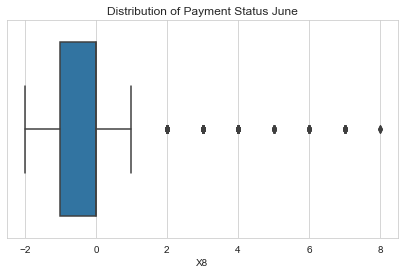

In [51]:
fig = plt.figure(figsize = (7,4))
sns.set_style(style="whitegrid")
sns.boxplot(x = df['X8'],linewidth=1.5);
plt.title('Distribution of Payment Status June');

In [52]:
df['X8'].value_counts()

 0    11821
-1     4464
-2     3024
 2     2891
 3      177
 4       58
 7       22
 6       19
 5       15
 1        4
 8        2
Name: X8, dtype: int64

In [53]:
df['X8'].replace([-2,-1], 0, inplace = True)

print(df['X8'].value_counts())

print(df['X8'].corr(df['Y']))

0    19309
2     2891
3      177
4       58
7       22
6       19
5       15
1        4
8        2
Name: X8, dtype: int64
0.2901744875040583


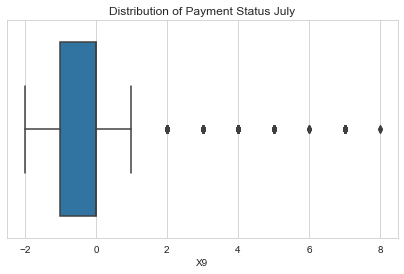

In [54]:
fig = plt.figure(figsize = (7,4))
sns.set_style(style="whitegrid")
sns.boxplot(x = df['X9'],linewidth=1.5);
plt.title('Distribution of Payment Status July');

In [55]:
print(df['X9'].value_counts())

print(df['X9'].corr(df['Y']))

 0    12329
-1     4280
-2     3227
 2     2390
 3      138
 4       49
 7       47
 5       28
 6        5
 8        2
 1        2
Name: X9, dtype: int64
0.21913671696325637


In [56]:
df['X9'].replace([-2,-1], 0, inplace = True)

print(df['X9'].value_counts())

print(df['X9'].corr(df['Y']))

0    19836
2     2390
3      138
4       49
7       47
5       28
6        5
8        2
1        2
Name: X9, dtype: int64
0.26912368746714854


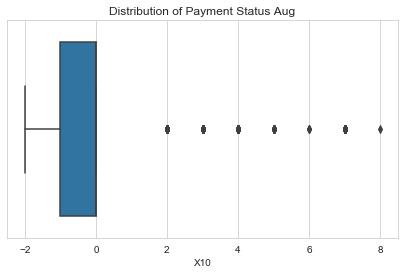

In [57]:
fig = plt.figure(figsize = (7,4))
sns.set_style(style="whitegrid")
sns.boxplot(x = df['X10'], linewidth = 1.5);
plt.title('Distribution of Payment Status Aug');

In [58]:
print(df['X10'].value_counts())

print(df['X10'].corr(df['Y']))

 0    12704
-1     4124
-2     3401
 2     2014
 3      128
 4       59
 7       47
 5       16
 6        3
 8        1
Name: X10, dtype: int64
0.2082425744344487


In [59]:
df['X10'].replace([-2,-1], 0, inplace = True)

print(df['X10'].value_counts())

print(df['X10'].corr(df['Y']))

0    20229
2     2014
3      128
4       59
7       47
5       16
6        3
8        1
Name: X10, dtype: int64
0.2632822074836045


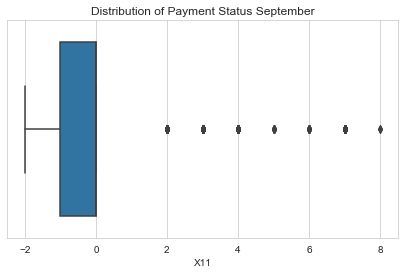

In [60]:
fig = plt.figure(figsize = (7,4))
sns.set_style(style="whitegrid")
sns.boxplot(x = df['X11'],linewidth=1.5);
plt.title('Distribution of Payment Status September');

In [61]:
print(df['X11'].value_counts())

print(df['X11'].corr(df['Y']))

 0    12231
-1     4284
-2     3663
 2     2078
 3      140
 7       38
 4       38
 6       14
 5        9
 8        2
Name: X11, dtype: int64
0.1934998885574723


In [62]:
df['X11'].replace([-2,-1], 0, inplace = True)

print(df['X11'].value_counts())

print(df['X11'].corr(df['Y']))

0    20178
2     2078
3      140
7       38
4       38
6       14
5        9
8        2
Name: X11, dtype: int64
0.2498476115784299


In [63]:
df['avg_pay_status'] = round(((df['X6'] + df['X7']+df['X8']+df['X9']+df['X10']+df['X11'])/6),2)

print(df['avg_pay_status'].corr(df['X8'])) 
print(df['avg_pay_status'].corr(df['Y']))

0.8274947402502858
0.3756108110106908


* maybe just use avg_pay_status than the individual values for each month
* Some of the indiv ones are also highly corr with the each other.
* drop the monthly info since this var highly corr with the indiv
* the avg_pay_status is fairly corr with the Y var.

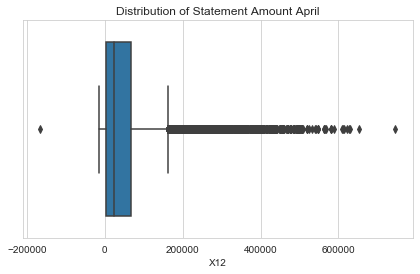

In [64]:
fig = plt.figure(figsize = (7,4))
sns.set_style(style="whitegrid")
sns.boxplot(x = df['X12'],linewidth=1.5);
plt.title('Distribution of Statement Amount April');

In [65]:
print(df['X12'].corr(df['Y']))

-0.01652372194496463


If the statement balance is negative, it means the indiv is owed money by the bank. For our target variable this extra information does not really add any more meaning than the account balance being at 0 leading to a duly paid account. For a cleaner data, setting all values less than 0 as 0 heavily skews the distribution and seems to affect correlation too. Leaving as is for now

/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


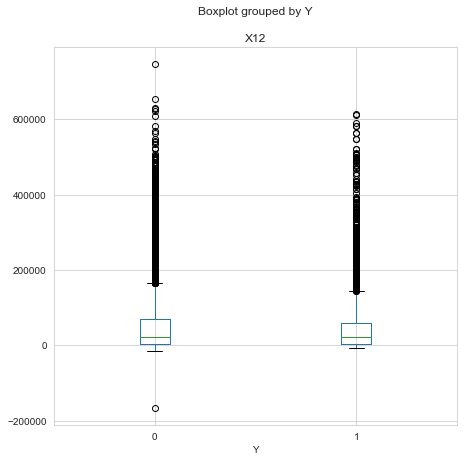

In [66]:
df.boxplot('X12', by = 'Y',figsize=(7,7))

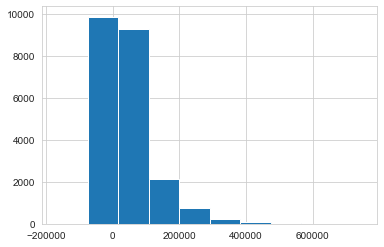

In [67]:
df['X12'].hist()

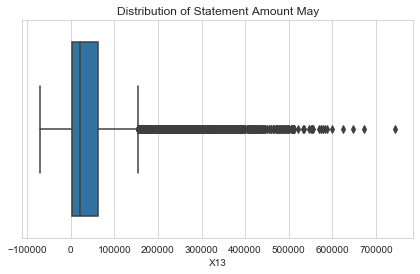

In [68]:
fig = plt.figure(figsize = (7,4))
sns.set_style(style="whitegrid")
sns.boxplot(x = df['X13'],linewidth=1.5);
plt.title('Distribution of Statement Amount May');

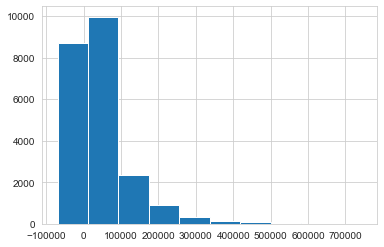

In [69]:
df['X13'].hist()

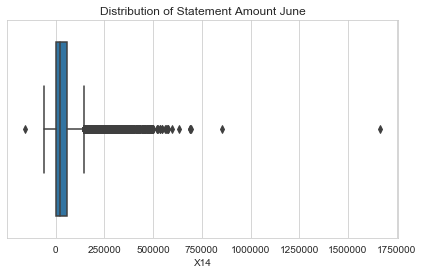

In [70]:
fig = plt.figure(figsize = (7,4))
sns.set_style(style="whitegrid")
sns.boxplot(x = df['X14'],linewidth=1.5);
plt.title('Distribution of Statement Amount June');

There seems to be outliers here. Need to drop

In [71]:
df[df['X14'] >= 800000] #Assuming a 800000 threshold for the outliers since the mean for this group is similar

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y,avg_pay_status
25732,80000,2,3,1,37,0,0,0,0,0,0,47751,-215,855086,632,632,124542,215,1024516,632,632,124542,14770,0,0.0
5297,500000,2,1,1,33,0,0,0,0,0,0,125,-18088,1664089,121757,97115,377217,4366,1684259,121831,97670,379267,26759,0,0.0


In [72]:
df.drop(labels= ['25732', '5297'], inplace = True) 

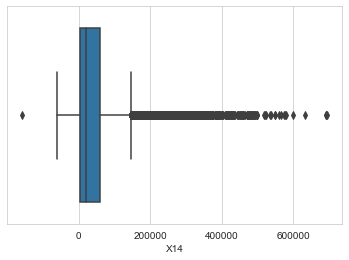

In [73]:
sns.boxplot(x = df['X14'],linewidth=1.5);

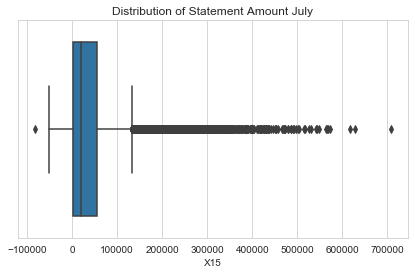

In [74]:
fig = plt.figure(figsize = (7,4))
sns.set_style(style="whitegrid")
sns.boxplot(x = df['X15'],linewidth=1.5);
plt.title('Distribution of Statement Amount July');

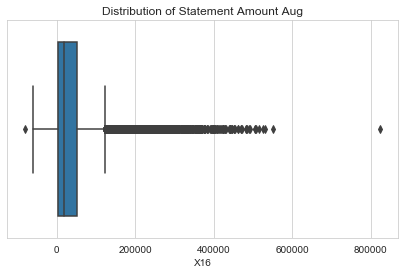

In [75]:
fig = plt.figure(figsize = (7,4))
sns.set_style(style="whitegrid")
sns.boxplot(x = df['X16'],linewidth=1.5);
plt.title('Distribution of Statement Amount Aug');

In [76]:
df[df['X16'] >= 800000]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y,avg_pay_status
20893,550000,1,1,2,35,2,2,2,2,2,0,539092,552234,565550,572805,823540,501370,23000,23000,18000,0,18373,18159,0,1.67


In [77]:
df.drop(labels= ['20893'] ,inplace = True) 

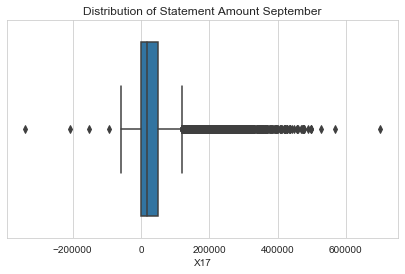

In [78]:
fig = plt.figure(figsize = (7,4))
sns.set_style(style="whitegrid")
sns.boxplot(x = df['X17'],linewidth=1.5);
plt.title('Distribution of Statement Amount September');

In [79]:
df['X17'].corr(df['Y'])

-0.0047634524720459705

In [80]:
df[df['X17'] <= -200000]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y,avg_pay_status
291,280000,1,1,2,33,0,0,0,0,0,0,898,898,325,898,325,-339603,898,325,898,325,0,345293,1,0.0
26098,290000,2,2,1,33,0,0,0,0,0,0,11303,17493,21036,17391,16348,-209051,17654,11068,7600,3352,6104,261883,0,0.0


In [81]:
df.drop(labels= ['291','26098'], inplace = True)

In [82]:
df['X17'].corr(df['Y'])

-0.004340501459341568

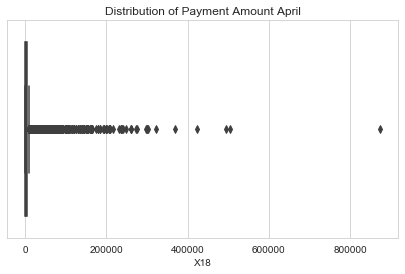

In [83]:
fig = plt.figure(figsize = (7,4))
sns.set_style(style="whitegrid")
sns.boxplot(x = df['X18'],linewidth=1.5);
plt.title('Distribution of Payment Amount April');

In [84]:
df['X18'].corr(df['Y'])

-0.07136310436479978

/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


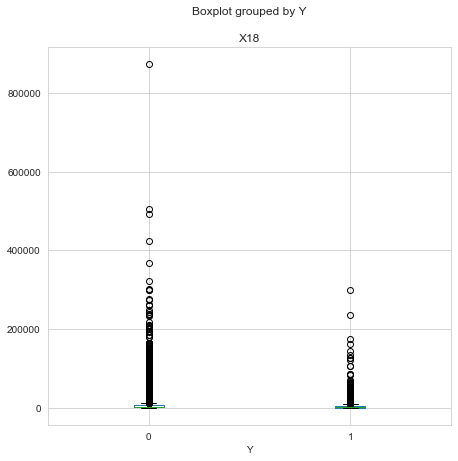

In [85]:
df.boxplot('X18', by = 'Y',figsize=(7,7))

In [108]:
df[df['X18'] >=500000]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y,avg_pay_status
12331,300000,1,2,1,37,1,0,2,0,0,0,-165580,324392,296931,30355,26771,23737,505000,331,1070,17771,18000,16079,0,0.5


In [110]:
df.drop(labels=['28717','12331'], inplace = True)
df['X18'].corr(df['Y'])

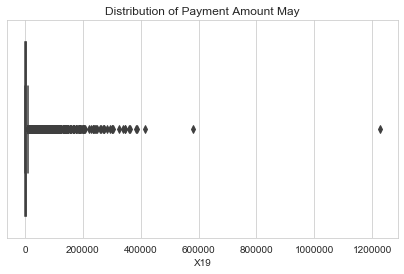

In [88]:
fig = plt.figure(figsize = (7,4))
sns.set_style(style="whitegrid")
sns.boxplot(x = df['X19'],linewidth=1.5);
plt.title('Distribution of Payment Amount May');

In [89]:
df.shape

(22491, 25)

In [111]:
df[df['X19'] >=500000]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y,avg_pay_status
14514,460000,2,1,1,43,0,0,0,0,0,0,323408,261444,309622,297039,258056,188083,5229,580464,80017,31017,27,38700,0,0.0


In [91]:
print(df['X19'].corr(df['Y']))
df.drop(labels='28004', inplace = True)
print(df['X19'].corr(df['Y']))

-0.06913549875206088
-0.07482130829830674


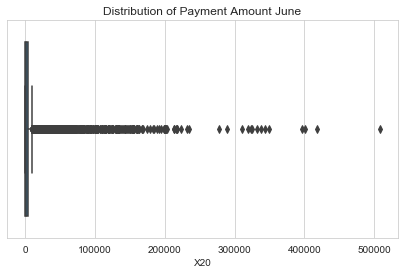

In [92]:
fig = plt.figure(figsize = (7,4))
sns.set_style(style="whitegrid")
sns.boxplot(x = df['X20'],linewidth=1.5);
plt.title('Distribution of Payment Amount June');

In [101]:
df[df['X20']> 500000]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y,avg_pay_status
27441,500000,1,1,1,35,2,0,0,0,0,0,510367,473584,167682,501496,508213,496801,24913,5872,508229,18089,14070,15009,1,0.33


In [ ]:
df.drop(labels=['27441'], inplace = True)

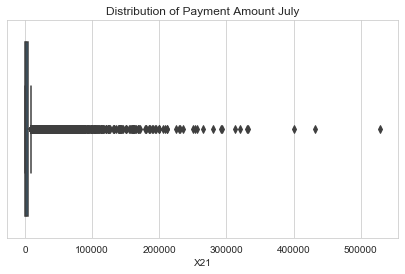

In [93]:
fig = plt.figure(figsize = (7,4))
sns.set_style(style="whitegrid")
sns.boxplot(x = df['X21'],linewidth=1.5);
plt.title('Distribution of Payment Amount July');

In [106]:
df[df['X21']> 500000]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y,avg_pay_status
24687,730000,1,2,1,37,0,0,0,0,0,0,70309,61991,49082,26873,514114,499100,20000,14023,9035,528897,22005,15000,0,0.0


In [ ]:
df.drop(labels=['24687'], inplace = True)

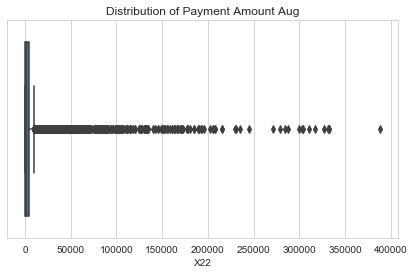

In [94]:
fig = plt.figure(figsize = (7,4))
sns.set_style(style="whitegrid")
sns.boxplot(x = df['X22'],linewidth=1.5);
plt.title('Distribution of Payment Amount Aug');

In [104]:
df[df['X22']> 500000]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y,avg_pay_status


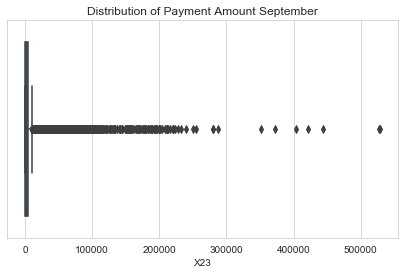

In [95]:
fig = plt.figure(figsize = (7,4))
sns.set_style(style="whitegrid")
sns.boxplot(x = df['X23'],linewidth=1.5);
plt.title('Distribution of Payment Amount September');

In [112]:
df[df['X23']> 500000]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y,avg_pay_status
14512,500000,1,1,2,30,0,0,0,0,0,0,1089,58665,168052,254571,59587,13398,58665,170119,156000,2000,13398,527143,0,0.0
507,500000,2,2,2,43,0,0,0,0,0,0,3959,0,285138,249445,222831,200,0,285138,4989,100,200,528666,0,0.0


In [ ]:
df.drop(labels=['14512','507'], inplace = True)

In [121]:
corr = df.corr()
corr
corr['Y'].sort_values(ascending = False)

Y                 1.000000
X6                0.393453
avg_pay_status    0.375746
X7                0.325351
X8                0.290280
X9                0.269231
X10               0.263398
X11               0.249861
X3                0.037474
X5                0.014624
X17              -0.004218
X16              -0.006362
X15              -0.008993
X13              -0.011054
X14              -0.011290
X12              -0.016325
X4               -0.032182
X2               -0.037756
X22              -0.054066
X21              -0.055349
X23              -0.057043
X20              -0.058032
X19              -0.074821
X18              -0.075716
X1               -0.155859
Name: Y, dtype: float64

In [97]:
corr[abs(corr > 0.70)]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y,avg_pay_status
X1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X5,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X6,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.737573
X7,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.794337
X8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.827450
X9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.751320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.843573
X10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.751320,1.000000,0.745104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.819448


In [98]:
df.values

array([[2.20000e+05, 2.00000e+00, 1.00000e+00, ..., 1.43779e+05,
        1.00000e+00, 0.00000e+00],
       [2.00000e+05, 2.00000e+00, 3.00000e+00, ..., 3.26000e+02,
        0.00000e+00, 0.00000e+00],
       [1.80000e+05, 2.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [1.00000e+05, 2.00000e+00, 3.00000e+00, ..., 8.65000e+02,
        0.00000e+00, 8.30000e-01],
       [2.00000e+04, 2.00000e+00, 3.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [2.00000e+04, 2.00000e+00, 1.00000e+00, ..., 8.00000e+02,
        0.00000e+00, 1.83000e+00]])

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_vif = df._get_numeric_data() #to get only the numeric columns

predictors = df

vif = pd.DataFrame()

#calculates VIF scores and formats output to two decimal points
vif['VIF'] = [format(variance_inflation_factor(predictors.values, i), '.2f') for i in range(predictors.shape[1])]
vif["features"] = predictors.columns

vif

,VIF,features
0,3.68,X1
1,9.14,X2
2,7.40,X3
3,6.43,X4
4,11.35,X5
5,7368.01,X6
6,7768.85,X7
7,7489.08,X8
8,6865.13,X9
9,6011.69,X10


In [120]:
amt_paid = df[['X18', 'X19','X20', 'X21', 'X22', 'X23', 'Y']]
amt_paid.loc[amt_paid['Y']==1]


,X18,X19,X20,X21,X22,X23,Y
28835,10000,8018,10121,6006,10987,143779,1
6239,2000,1100,600,300,300,1000,1
10033,2035,1577,2424,671,1606,27124,1
14162,0,0,200,5307,0,0,1
8043,0,4385,3639,3762,3800,3897,1
...,...,...,...,...,...,...,...
21110,1700,3243,1200,254,0,0,1
6229,7001,6180,6000,5951,5285,192557,1
11463,0,2000,430,0,0,0,1
16247,4600,1200,1400,0,3069,0,1
